In [1]:
import os
import shutil
import glob
from tqdm import tqdm
import random

data_dir = "~/VisualEmotion/data"
tr_split = 0.6
va_split = 0.8

## There are two datasets in six class: Emotion-6 and UnbiasedEmo
## Love -> Neutral, Anger(Disgust) -> Disgust 

In [2]:
## move UnbiasedEmo

for path in glob.glob("./data/UnBiasedEmo/images/*"):
    klass = path.split('/')[-1]
    imgs = glob.glob(path+'/*/*.jpg')
    random.shuffle(imgs)
    n = len(imgs)
    n_tr, n_va = int(n*tr_split), int(n*va_split)
    print(f"class: {klass}, all: {n}, train: {n_tr}, valid: {n_va-n_tr}, test: {n-n_va}")
    
    for i, img in enumerate(tqdm(imgs)):
        if i < n_tr:
            tgt = img.replace("UnBiasedEmo/images", "images/train")
        elif i < n_va:
            tgt = img.replace("UnBiasedEmo/images", "images/valid")
        else:
            tgt = img.replace("UnBiasedEmo/images", "images/test")
        #if klass == 'love':
        #   tgt = tgt.replace('love', 'neutral')
        if not os.path.exists('/'.join(tgt.split('/')[:-1])):
            os.makedirs('/'.join(tgt.split('/')[:-1]))
        
        # print(img, tgt)
        if os.path.exists(img):
            shutil.move(img, tgt)
        

class: joy, all: 587, train: 352, valid: 117, test: 118


100%|██████████| 587/587 [00:00<00:00, 951.54it/s]


class: fear, all: 153, train: 91, valid: 31, test: 31


100%|██████████| 153/153 [00:00<00:00, 894.88it/s]


class: sadness, all: 758, train: 454, valid: 152, test: 152


100%|██████████| 758/758 [00:00<00:00, 967.58it/s]


class: surprise, all: 457, train: 274, valid: 91, test: 92


100%|██████████| 457/457 [00:00<00:00, 972.20it/s]


class: anger, all: 440, train: 264, valid: 88, test: 88


100%|██████████| 440/440 [00:00<00:00, 962.15it/s] 


class: love, all: 650, train: 390, valid: 130, test: 130


100%|██████████| 650/650 [00:00<00:00, 996.32it/s] 


In [14]:
## move Emotion-6

if os.path.exists("./data/Emotion-6/images/anger/digust"): # typo in their dataset
    shutil.move("./data/Emotion-6/images/anger/digust", "./data/Emotion-6/images/disgust") 

for path in glob.glob("./data/Emotion-6/images/*"):
    klass = path.split('/')[-1]
    imgs = glob.glob(path+'/**/*.jpg',recursive=True)
    random.shuffle(imgs)
    n = len(imgs)
    n_tr, n_va = int(n*tr_split), int(n*va_split)
    print(f"class: {klass}, all: {n}, train: {n_tr}, valid: {n_va-n_tr}, test: {n-n_va}")
    
    for i, img in enumerate(tqdm(imgs)):
        if i < n_tr:
            tgt = img.replace("Emotion-6/images", "images/train")
        elif i < n_va:
            tgt = img.replace("Emotion-6/images", "images/valid")
        else:
            tgt = img.replace("Emotion-6/images", "images/test")

        #if klass == 'love':
        #    tgt = tgt.replace('love', 'neutral')
        if not os.path.exists('/'.join(tgt.split('/')[:-1])):
            os.makedirs('/'.join(tgt.split('/')[:-1]))
        
        # print(img, tgt)
        if os.path.exists(img):
            shutil.move(img, tgt)
        
  

class: disgust, all: 0, train: 0, valid: 0, test: 0


0it [00:00, ?it/s]


class: joy, all: 1964, train: 1178, valid: 393, test: 393


100%|██████████| 1964/1964 [00:01<00:00, 1010.94it/s]


class: fear, all: 1280, train: 768, valid: 256, test: 256


100%|██████████| 1280/1280 [00:01<00:00, 986.96it/s] 


class: sadness, all: 2221, train: 1332, valid: 444, test: 445


100%|██████████| 2221/2221 [00:02<00:00, 991.18it/s] 


class: surprise, all: 557, train: 334, valid: 111, test: 112


100%|██████████| 557/557 [00:00<00:00, 1043.77it/s]


class: anger, all: 1433, train: 859, valid: 287, test: 287


100%|██████████| 1433/1433 [00:01<00:00, 1008.73it/s]


class: love, all: 724, train: 434, valid: 145, test: 145


100%|██████████| 724/724 [00:00<00:00, 993.35it/s] 


In [1]:
! rm ~/VisualEmotion/data/images/train/anger/rage/rage/287.jpg

<AxesSubplot:>

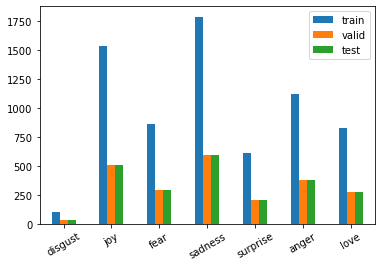

In [15]:
## counting imbalance class
import pandas as pd
res = {}
for name in ["train","valid","test"]:
    klass = {}
    for path in glob.glob(f"./data/images/{name}/*"):
        t = path.split('/')[-1]
        imgs = glob.glob(path + "/**/*.jpg", recursive=True)
        klass[t] = len(imgs)
    res[name] = klass
res = pd.DataFrame(res)
res.plot.bar(rot=30)

In [16]:
t = res/res.sum(axis=0)
t

,train,valid,test
disgust,0.014930,0.014919,0.015324
joy,0.223946,0.223782,0.223730
fear,0.125732,0.125932,0.125657
sadness,0.261417,0.261518,0.261384
surprise,0.088993,0.088635,0.089317
anger,0.164374,0.164546,0.164186
love,0.120609,0.120667,0.120403


In [17]:
print(t.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &     train &     valid &      test \\
\midrule
disgust  &  0.014930 &  0.014919 &  0.015324 \\
joy      &  0.223946 &  0.223782 &  0.223730 \\
fear     &  0.125732 &  0.125932 &  0.125657 \\
sadness  &  0.261417 &  0.261518 &  0.261384 \\
surprise &  0.088993 &  0.088635 &  0.089317 \\
anger    &  0.164374 &  0.164546 &  0.164186 \\
love     &  0.120609 &  0.120667 &  0.120403 \\
\bottomrule
\end{tabular}

